In [109]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import RFE
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
t1 = pd.read_csv('train.csv')
t2 = pd.read_csv('test.csv')
df = pd.concat([t1,t2])
df['rating'] = df['click_bool'] + (4 * df['booking_bool'])

In [4]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [5]:
clicked = df[df['click_bool']==1]

print(df['click_bool'].value_counts())
print(clicked['booking_bool'].value_counts())

0    237319
1    221879
Name: click_bool, dtype: int64
1    138390
0     83489
Name: booking_bool, dtype: int64


Text(0.5, 1.0, 'Clicked on grouped by review score')

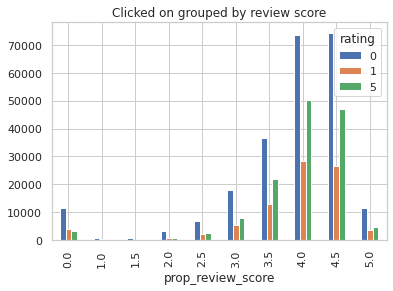

In [6]:
pd.crosstab(df.prop_review_score,df.rating).plot(kind='bar')
plt.title('Clicked on grouped by review score')

Text(0.5, 1.0, 'Clicked on grouped by star rating')

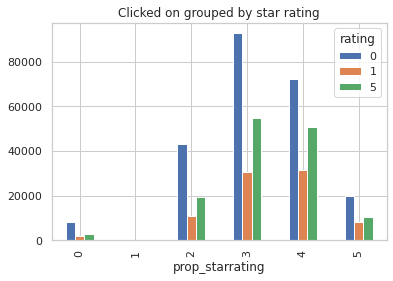

In [7]:
pd.crosstab(df.prop_starrating,df.rating).plot(kind='bar')
plt.title('Clicked on grouped by star rating')

Text(0.5, 1.0, 'Booked after clicking grouped by rating')

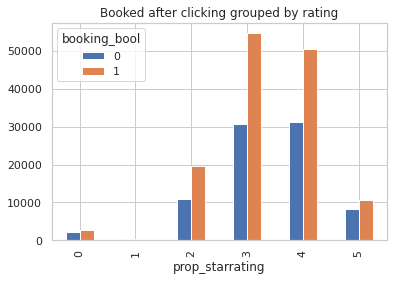

In [8]:
pd.crosstab(clicked.prop_starrating,clicked.booking_bool).plot(kind='bar')
plt.title('Booked after clicking grouped by rating')

In [79]:
train =  df[['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag', 'rating']]
train.isna().sum()

prop_starrating             0
prop_review_score         642
prop_brand_bool             0
prop_location_score1        0
prop_location_score2    79743
price_usd                   0
promotion_flag              0
rating                      0
dtype: int64

In [85]:
train = train.dropna()

In [102]:
X = train[['prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 
           'prop_location_score2', 'price_usd', 'promotion_flag']]
y = train['rating']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [105]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

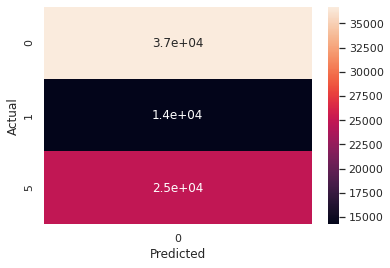

In [107]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [110]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.4838386633461148
